In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# Load Images
images = {
    "train":{},
    "test":{}
}
for typ in ["train","test"]:
    car_type = [p for p in os.listdir(f"../dataset/{typ}")] #if os.path.isdir(f"../dataset/{typ}/{p}")]
    for vehicle in car_type:
        files = os.listdir(f"../dataset/{typ}/{vehicle}")
        for file in files:
            path = f"../dataset/{typ}/{vehicle}/{file}"
            if path.endswith(".jpg") or path.endswith(".jpeg"):
                img = cv2.imread(path)
                aux = img
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images[typ][vehicle] = images[typ].get(vehicle,[]) + [img]


img = cv2.imread("../dataset/train/car/102car.jpg")

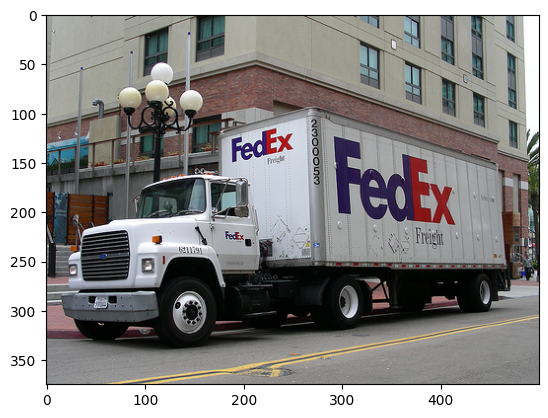

In [4]:
#Se puede borrar despues
plt.imshow(images["train"]["truck"][0])

In [5]:
# convertir las imagnes a gris
images_gray = {
    "train":{},
    "test":{}
}

for key, value in images.items():
    for vehicle, imgs in value.items():
        imgs = [cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) for im in imgs]
        images_gray[key][vehicle] = imgs


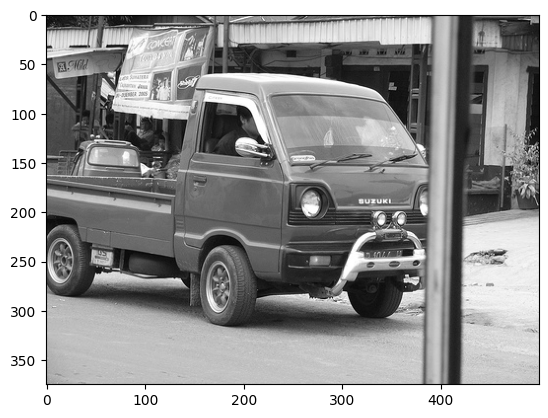

In [6]:
plt.imshow(images_gray["train"]["truck"][36], cmap="gray")

In [7]:
# Create our body classifier
#car_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_car.xml')
#car_class = cv2.CascadeClassifier('../dataset/haarcascade_car.xml')
car_class = cv2.CascadeClassifier("../dataset/cars.xml")


In [8]:
vehicle_detect = {
    "train":{},
    "test":{}
}

for key, value in images_gray.items():
    for vehicle, imgs in value.items():
        imgs = [car_class.detectMultiScale(im,scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)) for im in imgs]

        vehicle_detect[key][vehicle] = imgs




In [9]:
vehicle_detect["test"]["car"][2]

()

In [152]:
def rect_fr(face):
    y,x,y_2,x_2 = face
    h = x-x_2
    w = y-y_2
    """
    Convert from opencv coordinates to 4 points in matplotlib
    """
    return [
        [x,x+w,x+w,x,x],
        [y,y,y+h,y+h,y]
    ]

In [11]:
x,y,w,h = vehicle_detect["test"]["car"][1][0]

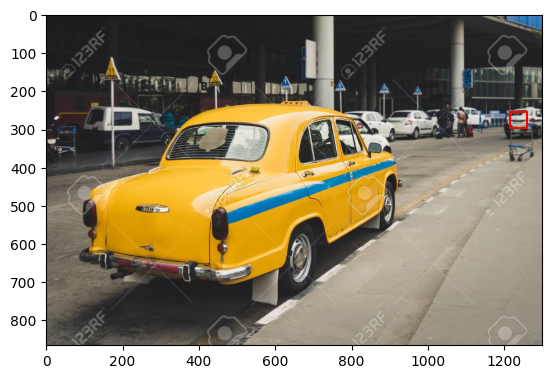

In [13]:
plt.imshow(images["test"]["car"][1])
plt.plot(*rect(x,y,w,h), c="r")

Prueba con una sola imagen y ver que pasa

La convertimos en escala de gris

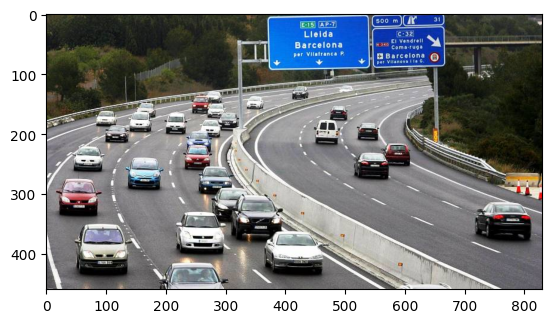

In [247]:
pic1 = cv2.imread("../dataset/Autopista-peaje-1.jpg")
#pic1 = cv2.imread("../dataset/train/car/35car.jpg")
pic1 = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
plt.imshow(pic1)


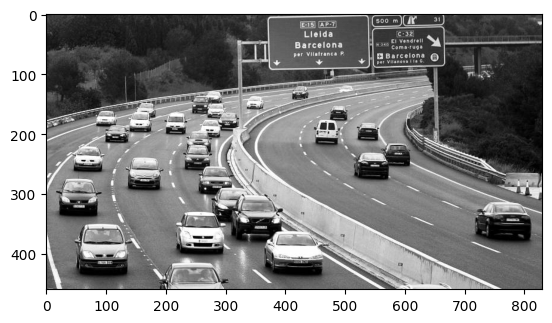

In [248]:
pic1_gris = cv2.cvtColor(pic1, cv2.COLOR_RGB2GRAY)
plt.imshow(pic1_gris,cmap="gray")

In [250]:

car_cascade = cv2.CascadeClassifier("../dataset/haarcascade_car.xml")

In [292]:

cars = car_cascade.detectMultiScale(pic1_gris, scaleFactor=1.05, minNeighbors=5, minSize=(10, 10))
#cars = car_cascade.detectMultiScale(pic1_gris, 1.1, 3)


In [293]:
cars

array([[235, 134,  45,  45],
       [401, 109,  46,  46],
       [131, 160,  54,  54],
       [ 75, 157,  45,  45],
       [283, 159,  46,  46],
       [506, 165,  65,  65],
       [188, 159,  59,  59],
       [ 90, 175,  57,  57],
       [564, 212,  58,  58],
       [219, 213,  64,  64],
       [437, 173,  66,  66],
       [ 29, 207,  80,  80],
       [513, 223,  74,  74],
       [119, 228,  93,  93],
       [  2, 262, 104, 104],
       [199, 319, 122, 122]], dtype=int32)

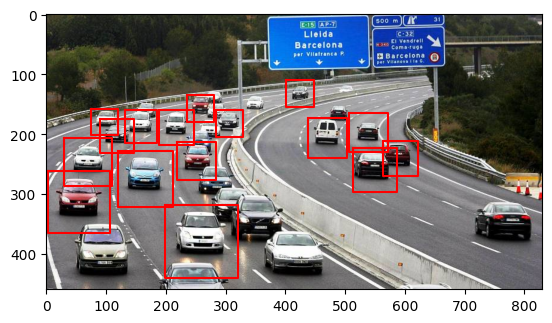

In [294]:
plt.imshow(pic1)
for i in cars:
    x,y,w,h = i
    plt.plot(*rect(x,y,w,h), c="r")
    